In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img

import random
import os

In [10]:
rock_dir = os.path.join('C:/Users/saidh/Desktop/projects/Predicting Corona(publication)/Data')

print('Total training rock images:', len(os.listdir(rock_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

Total training rock images: 3
Total training paper images: 3
Total training scissors images: 3
['Covid', 'Normal', 'Pneumonia']
['Covid', 'Normal', 'Pneumonia']
['Covid', 'Normal', 'Pneumonia']


In [12]:
TRAINING_DIR = "C:/Users/saidh/Desktop/projects/Predicting Corona(publication)/Data"
training_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

VALIDATION_DIR = "C:/Users/saidh/Desktop/projects/Predicting Corona(publication)/Data"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150,150),
    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(150,150),
    class_mode='categorical')

Found 301 images belonging to 3 classes.
Found 301 images belonging to 3 classes.


In [13]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [15]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [16]:
history = model.fit_generator(train_generator, epochs=25, validation_data = validation_generator, verbose = 1)

model.save("rps.h5")

Epoch 1/25
10/10 [==============================] - 82s 8s/step - loss: 1.4660 - acc: 0.3476 - val_loss: 1.1267 - val_acc: 0.3322
Epoch 2/25
10/10 [==============================] - 66s 7s/step - loss: 1.1115 - acc: 0.3718 - val_loss: 1.1004 - val_acc: 0.3322
Epoch 3/25
10/10 [==============================] - 64s 6s/step - loss: 1.1393 - acc: 0.3885 - val_loss: 1.0889 - val_acc: 0.3322
Epoch 4/25
10/10 [==============================] - 63s 6s/step - loss: 1.0364 - acc: 0.4555 - val_loss: 1.0814 - val_acc: 0.4120
Epoch 5/25
10/10 [==============================] - 68s 7s/step - loss: 1.0083 - acc: 0.5036 - val_loss: 0.9794 - val_acc: 0.5515
Epoch 6/25
10/10 [==============================] - 60s 6s/step - loss: 0.9300 - acc: 0.6094 - val_loss: 0.8982 - val_acc: 0.6711
Epoch 7/25
10/10 [==============================] - 58s 6s/step - loss: 0.9300 - acc: 0.6533 - val_loss: 0.8554 - val_acc: 0.7442
Epoch 8/25
10/10 [==============================] - 60s 6s/step - loss: 0.8577 - acc: 0.67

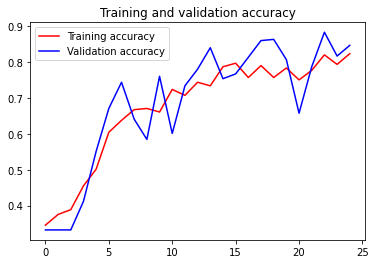

<Figure size 432x288 with 0 Axes>

In [17]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

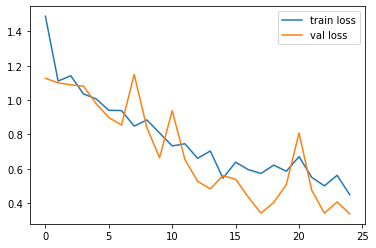

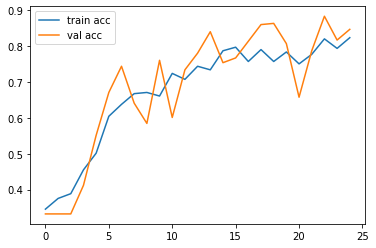

In [19]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['acc'], label='train acc')
plt.plot(history.history['val_acc'], label='val acc')
plt.legend()
plt.show()

In [59]:
import os
import glob

from keras.applications.vgg16 import VGG16
from keras.layers import Input, Flatten, Dense
from keras.models import Model
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.optimizers import adam
from keras.preprocessing.image import ImageDataGenerator

num_classes = 3  # Change according to your application
batch_size = 20

if num_classes == 3:
    last_layer_classifier = num_classes-1
    cl_mode = 'binary'
    classifier_loss = 'binary_crossentropy'
else:
    last_layer_classifier = num_classes-1
    cl_mode = 'categorical'
    classifier_loss = 'categorical_crossentropy'

# 2. Data pre-processing

train_datagen = ImageDataGenerator(rescale=1. / 255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1. / 255)

main_output_dir = os.getcwd()
output_dir = main_output_dir + '/Desktop/projects/Predicting Corona(publication)/Data'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print('C:/Users/saidh/Desktop/projects/Predicting Corona(publication)/Data')

    output_dir = main_output_dir + '/Desktop/projects/Predicting Corona(publication)/Data'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    print('C:/Users/saidh/Desktop/projects/Predicting Corona(publication)/Data')

    train_samples = 500  # change according to your application
    test_samples = 200  # change according to your application

    training_set = train_datagen.flow_from_directory('training_set', target_size=(224, 224), batch_size=batch_size,
                                                     class_mode=cl_mode)
    test_set = test_datagen.flow_from_directory('test_set', target_size=(224, 224), batch_size=batch_size,
                                                class_mode=cl_mode)

    # 3. import pre-trained network

    model = VGG16(weights='imagenet', include_top=True)
    print(model.summary())

    # 4. Remove last layer of the pre-trained network and add layer according to available classes

    x = Dense(last_layer_classifier, activation='softmax', name='predictions')(model.layers[-2].output)
    my_model = Model(input=model.input, output=x)
    print(my_model.summary())

    # 5. List of callbacks

    weight_name = 'image_classification_model_weights.h5'
    checkpoint = ModelCheckpoint(weight_name, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
    early = EarlyStopping(monitor='val_loss', patience=8, verbose=1, mode='min')
    lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=0, mode='auto', cooldown=0,
                           min_lr=0.000000001)
    callbacks_list = [checkpoint, lr, early]

    # 6. Model compile and train the model

    adam = adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    my_model.compile(optimizer=adam, loss=classifier_loss, metrics=['accuracy'])
    history = my_model.fit_generator(training_set, steps_per_epoch=round(len(train_samples) / batch_size, epochs=100,
                                                                         validation_data=test_set,
                                                                         validation_steps=round(
                                                                             len(test_samples) / batch_size,
                                                                             callbacks=callbacks_list, shuffle=True,
                                                                             verbose=1)))

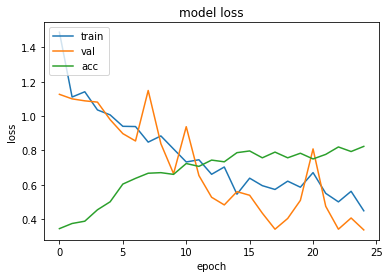

In [63]:
# 7. Plot the curves
import matplotlib.pyplot as plt

    # Loss curve
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['acc'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val','acc'], loc='upper left')
plt.savefig('loss.png')


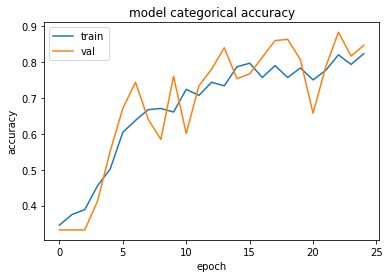

In [61]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model categorical accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('accuracy.png')